[Qubit(QuantumRegister(3, 'a'), 0), Qubit(QuantumRegister(3, 'a'), 1), Qubit(QuantumRegister(3, 'a'), 2), Qubit(QuantumRegister(4, 'b'), 0), Qubit(QuantumRegister(4, 'b'), 1), Qubit(QuantumRegister(4, 'b'), 2), Qubit(QuantumRegister(4, 'b'), 3), Qubit(QuantumRegister(1, 'helper'), 0)]
 3  1 0100 {'0100': 1024} 


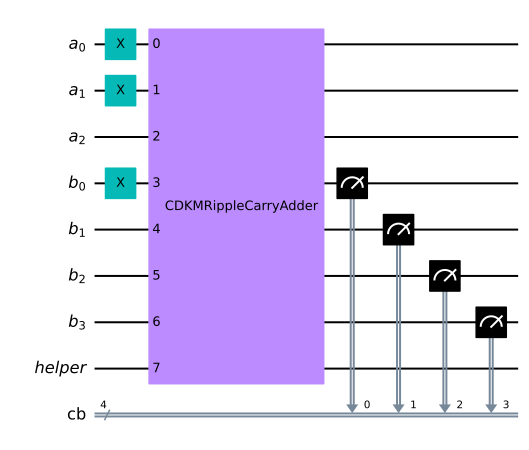

In [1]:
""" Qiskit circuit library CDKMRippleCarryAdder test
"""

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit import transpile
from qiskit_aer import Aer


def set_value(circ: QuantumCircuit, qr: QuantumRegister, val: int):
    """ decompose an integer value into bits and set them
        to a quantum register
    """
    n = qr.size
    for k in range(n):
        mask = 1 << k
        if val & mask:
            circ.x(qr[k])


def do_add(aval: int, bval: int, n: int):
    """ Build a circuit to add to integers and run a simulation.
    """
    ra = QuantumRegister(n, "a")
    rb = QuantumRegister(n+1, "b")
    rh = QuantumRegister(1, "helper")
    rcb = ClassicalRegister(n+1, "cb")
    qc = QuantumCircuit(ra, rb, rh, rcb)
    set_value(qc, ra, aval)
    set_value(qc, rb, bval)
    qubits = list(ra)+list(rb)+list(rh)
    print(qubits)
    qc.append(CDKMRippleCarryAdder(n, kind='half'), qubits)

    qc.measure(rb, rcb)

    sim = Aer.get_backend('aer_simulator')
    result = sim.run(transpile(qc, sim)).result()
    counts = result.get_counts()
    expected = bin((1 << (n+1)) + aval+bval)[-(n+1):]
    if expected in counts.keys():
        msg = ""
    else:
        msg = "FAIL"
    print(f"{aval:2} {bval:2} {expected} {counts} {msg}")
    return qc


qc = do_add(3, 1, 3)

qc.draw('mpl')
